In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, Y_test.shape

((10000, 28, 28), (10000,))

In [5]:
def random_plot():
    x = np.random.randint(X_train.shape[0])
    plt.imshow(X_train[x], cmap = 'gray')
    plt.title('Number: ' + str(Y_train[x]))

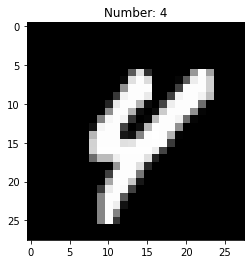

In [12]:
random_plot()

In [8]:
X_train[0].shape

(28, 28)

In [13]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
X_train = X_train.reshape((60000,28,28,1))
X_train = X_train.astype('float32')/255

X_test = X_test.reshape((10000,28,28,1))
X_test = X_test.astype('float32')/255

In [15]:
X_train[0].shape

(28, 28, 1)

In [16]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

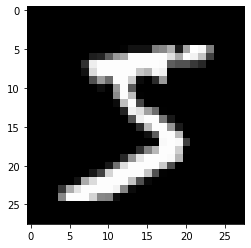

In [17]:
plt.imshow(X_train[0], cmap='gray')

In [18]:
data_generator = ImageDataGenerator(
        rotation_range = 10,  
        zoom_range = 0.10,  
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

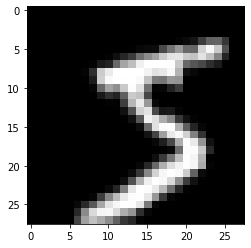

In [22]:
img = data_generator.flow(X_train[0].reshape(1,28,28,1), batch_size = 1)

plt.imshow(image.array_to_img(img[0][0]), cmap='gray')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(2, (3,3), input_shape = (28,28,1), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(2, (3,3), activation = 'sigmoid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(data_generator.flow(X_train, Y_train, batch_size = 32), epochs = 30)

In [ ]:
model.evaluate(X_test, Y_test)

In [ ]:
model.save('conv.h5')